In [45]:
import pandas as pd 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from typing import List
import os 
import numpy as np 

In [46]:
def compute_rouge_l(candidate, reference):
    m, n = len(candidate), len(reference)
    #print(m,n)
    dp_table = [[0] * (n + 1) for _ in range(m + 1)]
    
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if candidate[i - 1] == reference[j - 1]:
                dp_table[i][j] = dp_table[i - 1][j - 1] + 1
            else:
                dp_table[i][j] = max(dp_table[i - 1][j], dp_table[i][j - 1])
    
    return dp_table[m][n] / n

In [47]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [48]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\liang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
def preprocess_text(text):
    # Tokenize the text
    #tokens = word_tokenize(text.lower())
    tokens = word_tokenize()

    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    return filtered_tokens


In [50]:
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    return tokens

In [51]:
rag_flare_df = pd.read_csv('rag_flare_syntheses.csv')

In [60]:
# Fill NaN values in the 'actual' column with the string value 'None'
rag_flare_df['synthesis'].fillna('None', inplace=True)

In [61]:
rag_flare_df.isnull().sum()

Unnamed: 0.1     0
Unnamed: 0       0
synthesis        0
actual           0
evidence_text    0
question         0
dtype: int64

In [54]:
rag_flare_df.to_csv('rag_flare_syntheses.csv')

In [55]:
def compute_similarity_score(answer,syntheses):
    tokens_answer = preprocess_text(answer)
    tokens_syntheses = preprocess_text(syntheses)
    str_answer = ' '.join(tokens_answer)
    str_syntheses = ' '.join(tokens_syntheses)
    freqdist_answer = nltk.FreqDist(str_answer.split())
    freqdist_syntheses = nltk.FreqDist(str_syntheses.split())
    # Extract frequencies for unique tokens in both texts
    unique_tokens = set(freqdist_answer.keys()).union(freqdist_syntheses.keys())

    freq_answer = [freqdist_answer[token] for token in unique_tokens]
    freq_syntheses = [freqdist_syntheses[token] for token in unique_tokens]

    vector_answer = np.array(freq_answer).reshape(1, -1)
    vector_syntheses = np.array(freq_syntheses).reshape(1, -1)

    similarity_score = cosine_similarity(vector_answer, vector_syntheses)[0][0]

    return similarity_score

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()


In [73]:
#total_average_rouge_l_scores = []
#total_average_cosine_similarity_scores = []

rouge_l_scores = [] 
cosine_similarity_scores = [] 

for idx, row in rag_flare_df.iterrows():
    answer = row['actual']
    syntheses = row['synthesis'] 
    print(answer,syntheses)

    compute_sim_score = compute_similarity_score(answer, syntheses)
    cosine_similarity_scores.append(compute_sim_score)

    rouge_l_score = compute_rouge_l(answer, syntheses)
    rouge_l_scores.append(rouge_l_score)

total_average_cosine_similarity_score = sum(cosine_similarity_scores) / len(cosine_similarity_scores)

total_average_rouge_l_score = sum(rouge_l_scores) / len(rouge_l_scores)


$1577.00 The FY2018 capital expenditure amount for 3M was $1,749 million. This can be found in the "Cash Flows from Investing Activities" section of the Consolidated Statement of Cash Flows for the year ended December 31, 2018. 
$8.70 The year end FY2018 net PPNE for 3M was $8.738 billion.  This information can be found on the balance sheet under the "Property, Plant and Equipment" section. 
No, the company is managing its CAPEX and Fixed Assets pretty efficiently, which is evident from below key metrics:
CAPEX/Revenue Ratio: 5.1%
Fixed assets/Total Assets: 20%
Return on Assets= 12.4% Yes, based on the data provided, 3M appears to be a capital-intensive business with a significant amount of property, plant, and equipment, as well as other assets. This is likely due to the nature of their business, which involves manufacturing and producing physical products. 
Operating Margin for 3M in FY2022 has decreased by 1.7% primarily due to: 
-Decrease in gross Margin
-mostly one-off charges inc

In [74]:
total_average_cosine_similarity_score

0.2605723127284147

In [78]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm


In [79]:
num_labels = [i * 10  for i in range(1,6)]

In [80]:
total_average_cosine_similarity_scores =  [1 * total_average_cosine_similarity_score for i in range(1,6)]

In [83]:
total_average_rouge_l_scores =  [1 * total_average_rouge_l_score for i in range(1,6)]

Text(0.5, 1.0, ' After Fine-Tuning Cosine Similarity Score')

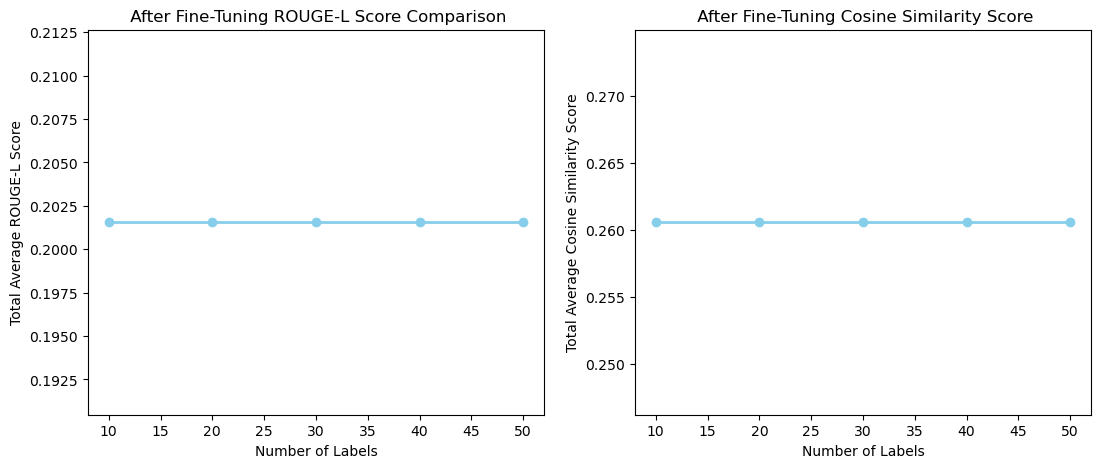

In [86]:
plt.figure(figsize=(20, 5))

# Plot Accuracy
plt.subplot(1, 3, 1)
plt.plot(num_labels, total_average_rouge_l_scores, marker='o', linestyle='-', color='skyblue', linewidth=2)

plt.xlabel('Number of Labels')
plt.ylabel('Total Average ROUGE-L Score')
plt.title(' After Fine-Tuning ROUGE-L Score Comparison')

plt.subplot(1, 3, 2)
plt.plot(num_labels, total_average_cosine_similarity_scores, marker='o', linestyle='-', color='skyblue', linewidth=2)
plt.xlabel('Number of Labels')
plt.ylabel('Total Average Cosine Similarity Score')
plt.title(' After Fine-Tuning Cosine Similarity Score')
